In [1]:
# Processamento de dados
import pandas as pd  # trabalhar com tabelas
import numpy as np   # trabalhar com vetores e matrizes
from collections import Counter #Checar a quantidade de Strings diferentes que um atributo possui


# Aprendizado de Máquina
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler  # Escalonamento 
from sklearn.model_selection import train_test_split, cross_validate, StratifiedKFold # Separação treino e teste
from sklearn.model_selection import GridSearchCV # Encontrar os melhores hiperparametros para um modelo
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, plot_confusion_matrix
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve, ConfusionMatrixDisplay, RocCurveDisplay, confusion_matrix, classification_report, plot_roc_curve

from sklearn.metrics import make_scorer, classification_report
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score  # Métricas de desempenho Regressao
from sklearn.metrics.scorer import accuracy_scorer

# Classificadores
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis, LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.dummy import DummyClassifier  # Classificador ingênuo para baseline 
from sklearn.tree import DecisionTreeClassifier # Arvores de Decisão
from sklearn.ensemble import RandomForestClassifier # RandomForest

from sklearn.pipeline import make_pipeline

# Regressão
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
# Gráficos
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree  # Plotar árvore de decisão

# Datasets
from sklearn import datasets


from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

D:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


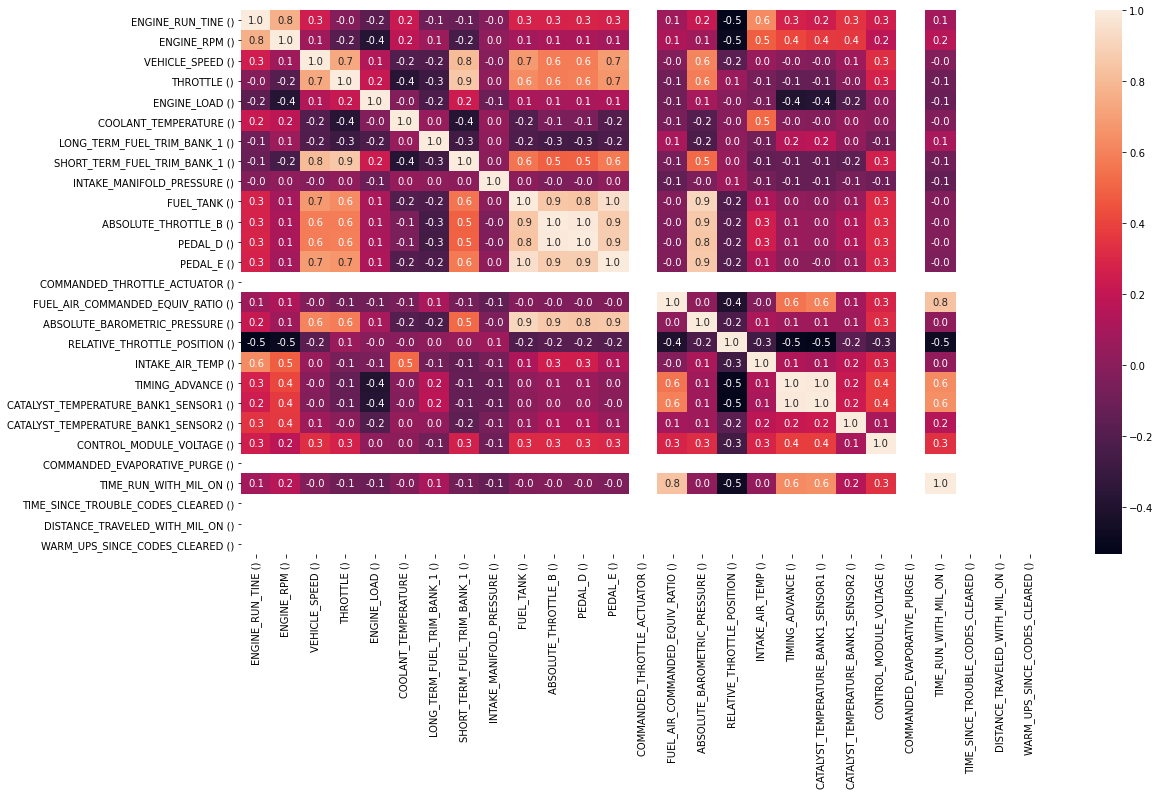

In [2]:
car = pd.read_csv('ufpe1.csv')
plt.figure(figsize=(18,10))
sns.heatmap(car.corr(method = 'pearson'), annot=True, fmt=".1f");

In [3]:
x = car.drop(columns = ['ENGINE_RUN_TINE ()',                     
'ENGINE_RPM ()',                            
'ENGINE_LOAD ()',                           
'COOLANT_TEMPERATURE ()',                   
'LONG_TERM_FUEL_TRIM_BANK_1 ()',            
'INTAKE_MANIFOLD_PRESSURE ()',              
'COMMANDED_THROTTLE_ACTUATOR ()',           
'FUEL_AIR_COMMANDED_EQUIV_RATIO ()',        
'RELATIVE_THROTTLE_POSITION ()',            
'INTAKE_AIR_TEMP ()',                       
'TIMING_ADVANCE ()',                       
'CATALYST_TEMPERATURE_BANK1_SENSOR1 ()',    
'CATALYST_TEMPERATURE_BANK1_SENSOR2 ()',    
'CONTROL_MODULE_VOLTAGE ()',                
'COMMANDED_EVAPORATIVE_PURGE ()',           
'TIME_RUN_WITH_MIL_ON ()',                  
'TIME_SINCE_TROUBLE_CODES_CLEARED ()',      
'DISTANCE_TRAVELED_WITH_MIL_ON ()',         
'WARM_UPS_SINCE_CODES_CLEARED ()',
'FUEL_TANK ()'                        ])

y = car['FUEL_TANK ()']
y=y.astype('float')

In [4]:
x_train, x_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    test_size=0.3, random_state=42)

[ 0.05294637 -0.00155152 -0.0070851   0.50638325 -0.60542683  0.91421194
  0.49583198] 44.15328004793605
[ 1.08019734e-12 -1.83782563e+00  2.83509727e-01  7.22505407e-02
  6.36416815e-01 -1.15202053e-01 -2.37372660e+00  3.84854860e+00
 -1.78400715e-02 -4.95573418e-03  4.13136302e-03 -1.26069160e-01
  1.01792150e-01  7.63401628e-02 -1.74216104e-02 -1.58063493e-05
  1.06380665e-04 -7.22507371e-03 -5.18054470e-03  5.98287009e-03
  1.17177465e-02  1.85760668e-04  1.89034877e-02 -7.92063927e-03
 -1.29303349e-02 -6.02385923e-03 -1.13656387e-01  3.13301592e-01
 -2.45260959e-01  2.17953773e-01 -2.03240476e-01  3.27416863e-01
 -2.57388932e-01 -1.21305132e-01  7.62093423e-02 -1.51485406e-04] 76.47493206080509
19.43713572601485


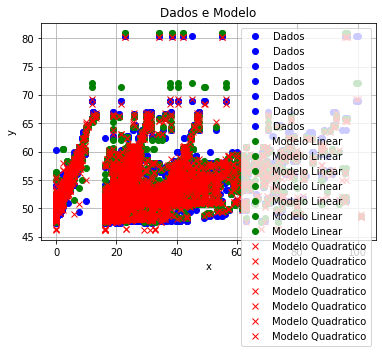

In [5]:
modelo_linear = LinearRegression().fit(x_train, y_train)
a_modelo = modelo_linear.coef_
b_modelo = modelo_linear.intercept_
print(a_modelo, b_modelo)

func_2 = PolynomialFeatures(degree=2)
xt_ = func_2.fit_transform(x_train)
modelo_quadratico = LinearRegression().fit(xt_ , y_train)
a_modelo = modelo_quadratico.coef_
b_modelo = modelo_quadratico.intercept_
print(a_modelo, b_modelo)

fig, ax = plt.subplots()
ax.plot(x, y, 'bo', label='Dados')
plt.plot(x_train, modelo_linear.predict(x_train), 'og', linewidth=3, label='Modelo Linear')
plt.plot(x_train, modelo_quadratico.predict(xt_), 'xr', linewidth=3, label='Modelo Quadratico')
ax.set(xlabel='x', ylabel='y', title='Dados e Modelo')
plt.legend()
ax.grid()

y_pred_linear = modelo_linear.predict(x_test)

xtest_ = func_2.fit_transform(x_test)
y_pred_quadratico = modelo_quadratico.predict(xtest_)

erro_linear = sum(y_test-y_pred_linear)
erro_quadratico = y_test-y_pred_quadratico
print(erro_linear)

In [6]:
# Mean Squared Error é uma métrica
MSE_linear = mean_squared_error(y_test, y_pred_linear)
MSE_quadratico = mean_squared_error(y_test, y_pred_quadratico)
print(MSE_linear, MSE_quadratico)

# Outra métrica de desempenho
MAE_linear = mean_absolute_error(y_test, y_pred_linear)
MAE_quadratico = mean_absolute_error(y_test, y_pred_quadratico)
print(MAE_linear, MAE_quadratico)

# Outra métrica de desempenho
R2_linear = modelo_linear.score(x_train, y_train)
R2_quadratico = modelo_quadratico.score(xt_, y_train)
print(R2_linear, R2_quadratico)


0.6107728472554764 0.705172869040765
0.5068523118580659 0.4676373584897571
0.9501561698408845 0.9636788681745245
